### Basic EDA and Visualization

1. Understanding the datasets - Basic infos
2. Data Quality Checks
    1. Missing Value
    2. Outlier Check
    3. Duplicate Check
    4. Dataset column type checks
3. Univariate, BiVariate, MultiVariate Analysis and Visualization

In [34]:
#loading the required packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import plotnine as p9 
import seaborn as sns
from scipy import stats
from mizani.formatters import percent_format

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 


In [2]:
#loading the dataset 
raw_data = pd.read_csv('./data/data_interview_test.csv', delimiter=':', dtype=str)
print('The shape of the dataset :' + str(raw_data.shape))
raw_data.head()

The shape of the dataset :(12034, 14)


,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
0,"10,000",10000,"10,468","10,000",0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,"10,000",10000,"10,468","10,001",0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,"10,000",10000,"10,468","10,003",0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,"10,000",10000,"10,468","10,004",0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,"10,000",10000,"10,468","10,005",0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


##### Missing value checks 

In [3]:
raw_data.isna().sum()

receipt_id                 0
company_id                 0
matched_transaction_id     0
feature_transaction_id     0
DateMappingMatch           0
AmountMappingMatch         0
DescriptionMatch           0
DifferentPredictedTime     0
TimeMappingMatch           0
PredictedNameMatch         0
ShortNameMatch             0
DifferentPredictedDate     0
PredictedAmountMatch       0
PredictedTimeCloseMatch    0
dtype: int64

In [4]:
raw_data[raw_data.isna().any(axis=1)]

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch


##### Duplicate value checks

In [5]:
print(f'Number of duplicate rows : {str(raw_data.duplicated().sum())}')
raw_data[raw_data.duplicated(keep=False)]

Number of duplicate rows : 0


,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch


##### Dataframe summary and Column type checks

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12034 entries, 0 to 12033
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   receipt_id               12034 non-null  object
 1   company_id               12034 non-null  object
 2   matched_transaction_id   12034 non-null  object
 3   feature_transaction_id   12034 non-null  object
 4   DateMappingMatch         12034 non-null  object
 5   AmountMappingMatch       12034 non-null  object
 6   DescriptionMatch         12034 non-null  object
 7   DifferentPredictedTime   12034 non-null  object
 8   TimeMappingMatch         12034 non-null  object
 9   PredictedNameMatch       12034 non-null  object
 10  ShortNameMatch           12034 non-null  object
 11  DifferentPredictedDate   12034 non-null  object
 12  PredictedAmountMatch     12034 non-null  object
 13  PredictedTimeCloseMatch  12034 non-null  object
dtypes: object(14)
memory usage: 1.3+ MB


In [7]:
#Unique Values checks
raw_data.nunique()

receipt_id                 1155
company_id                    5
matched_transaction_id     1155
feature_transaction_id     2132
DateMappingMatch             11
AmountMappingMatch            5
DescriptionMatch              5
DifferentPredictedTime        2
TimeMappingMatch              2
PredictedNameMatch            5
ShortNameMatch                2
DifferentPredictedDate        2
PredictedAmountMatch          6
PredictedTimeCloseMatch       2
dtype: int64

In [8]:
#Checking the numeric and category columns
numCols = list(raw_data.select_dtypes(['integer','float']).dtypes.index)
catCols = list(raw_data.select_dtypes(['object']).dtypes.index)


print('Numeric Columns :' + str(numCols))
print('Object Columns :' + str(catCols))

Numeric Columns :[]
Object Columns :['receipt_id', 'company_id', 'matched_transaction_id', 'feature_transaction_id', 'DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch', 'PredictedTimeCloseMatch']


In [9]:
for col in catCols:
    uniqueValues = raw_data[col].unique()
    if len(uniqueValues) < 10:
        print(f'The unique Values in {col} : {str(uniqueValues)}')

The unique Values in company_id : ['10000' '20000' '30000' '40000' '50000']
The unique Values in AmountMappingMatch : ['0.0000' '0.4000' '0.7000' '0.6000' '0.9000']
The unique Values in DescriptionMatch : ['0.0000' '0.6000' '0.4000' '0.8000' '0.2000']
The unique Values in DifferentPredictedTime : ['1.0000' '0.0000']
The unique Values in TimeMappingMatch : ['0.0000' '1.0000']
The unique Values in PredictedNameMatch : ['0.0000' '0.8000' '0.6000' '0.4000' '0.2000']
The unique Values in ShortNameMatch : ['0.0000' '1.0000']
The unique Values in DifferentPredictedDate : ['1.0000' '0.0000']
The unique Values in PredictedAmountMatch : ['0.0000' '0.1000' '0.5000' '0.4000' '0.6000' '0.2000']
The unique Values in PredictedTimeCloseMatch : ['0.0000' '1.0000']


In [18]:
#Data type transformation
feature_cols = ['DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch', 
                'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch', 
                'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch', 
                'PredictedTimeCloseMatch']

                
raw_data[feature_cols] = raw_data[feature_cols].apply(pd.to_numeric, errors='coerce')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12034 entries, 0 to 12033
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   receipt_id               12034 non-null  object 
 1   company_id               12034 non-null  object 
 2   matched_transaction_id   12034 non-null  object 
 3   feature_transaction_id   12034 non-null  object 
 4   DateMappingMatch         12034 non-null  float64
 5   AmountMappingMatch       12034 non-null  float64
 6   DescriptionMatch         12034 non-null  float64
 7   DifferentPredictedTime   12034 non-null  float64
 8   TimeMappingMatch         12034 non-null  float64
 9   PredictedNameMatch       12034 non-null  float64
 10  ShortNameMatch           12034 non-null  float64
 11  DifferentPredictedDate   12034 non-null  float64
 12  PredictedAmountMatch     12034 non-null  float64
 13  PredictedTimeCloseMatch  12034 non-null  float64
 14  matched               

##### Univariate, BiVariate , Multivariate analysis and Correlation

In [17]:
#Creating Matched and Feature Transaction are same
raw_data['matched'] = (raw_data['matched_transaction_id'] == raw_data['feature_transaction_id']).astype(int)

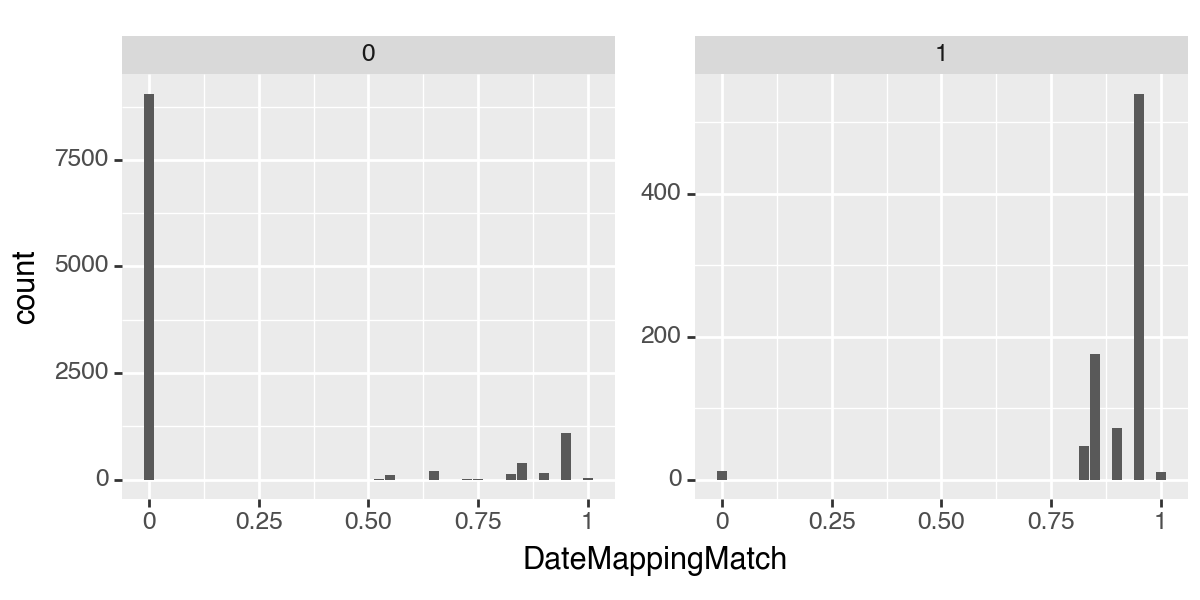

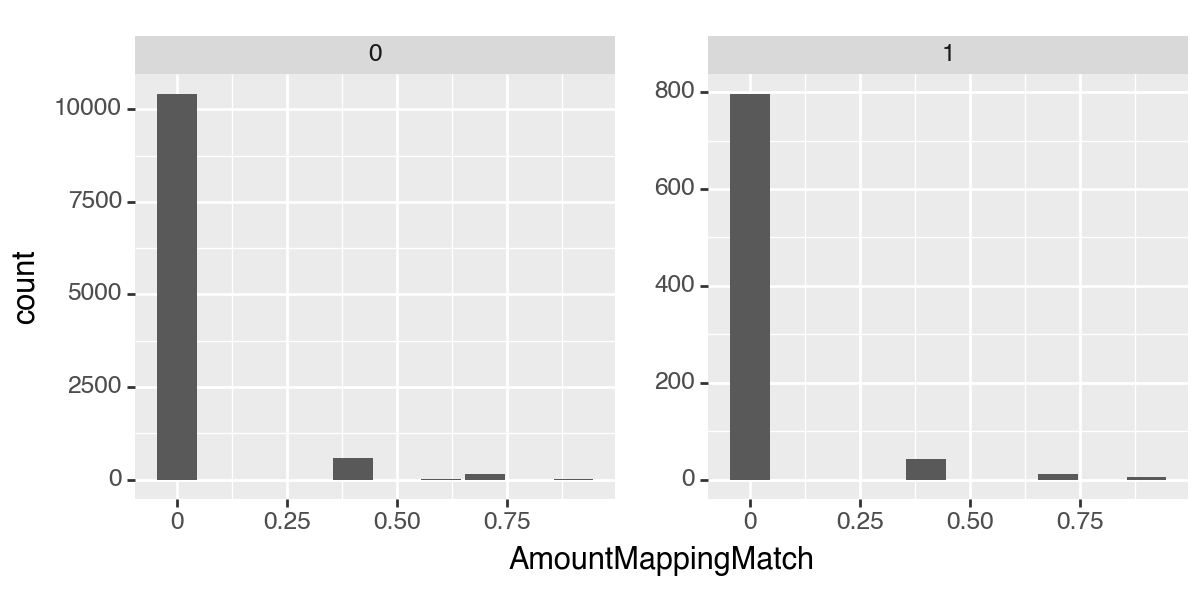

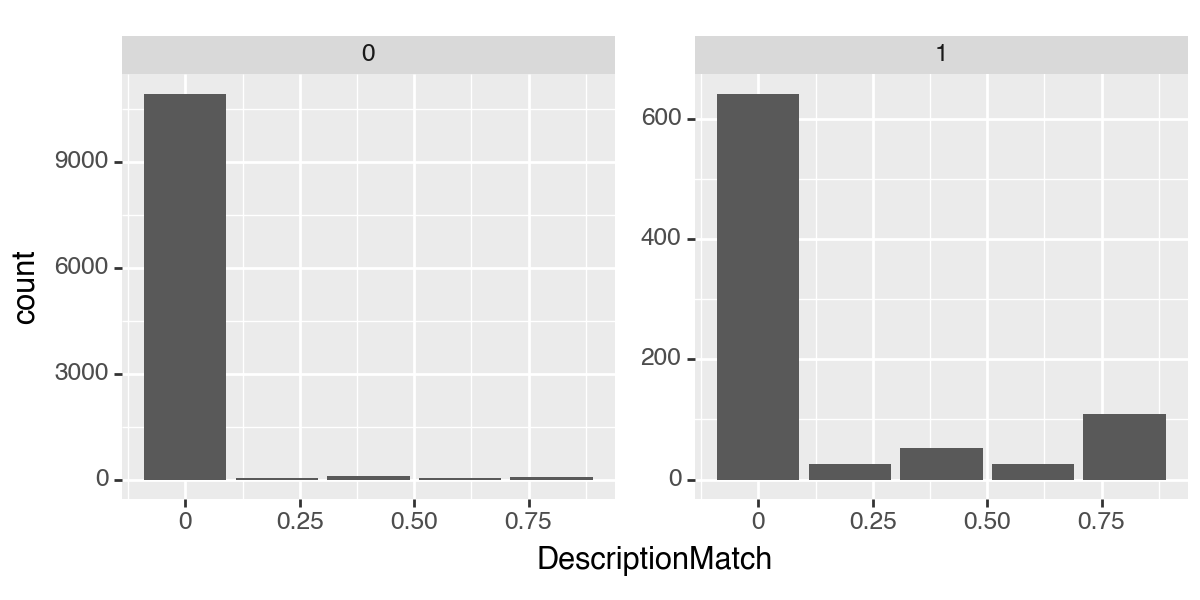

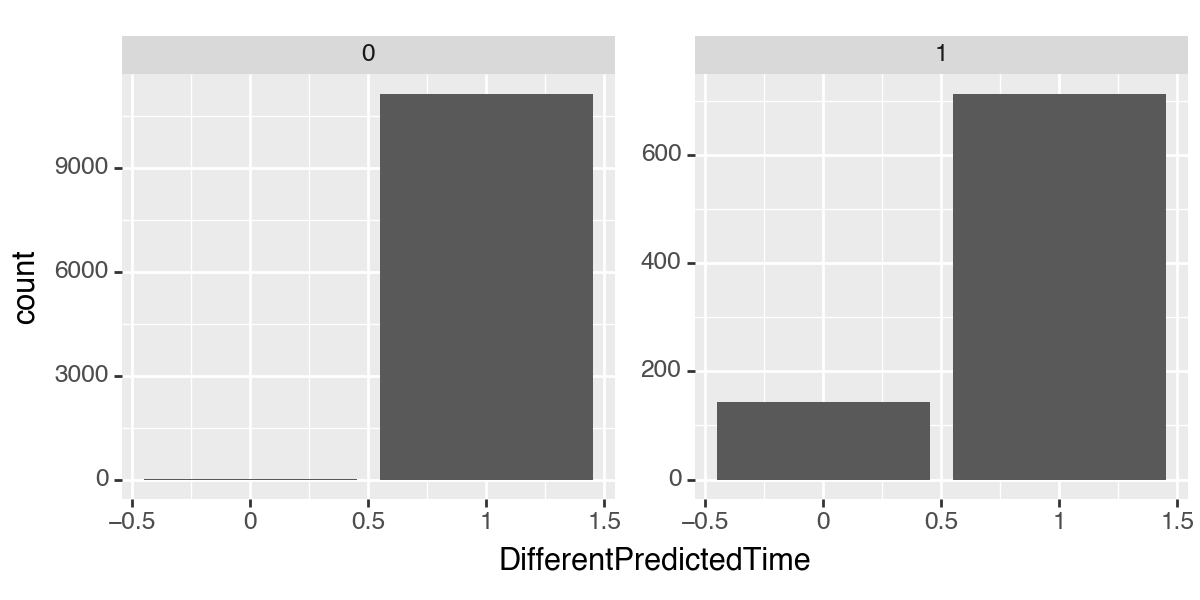

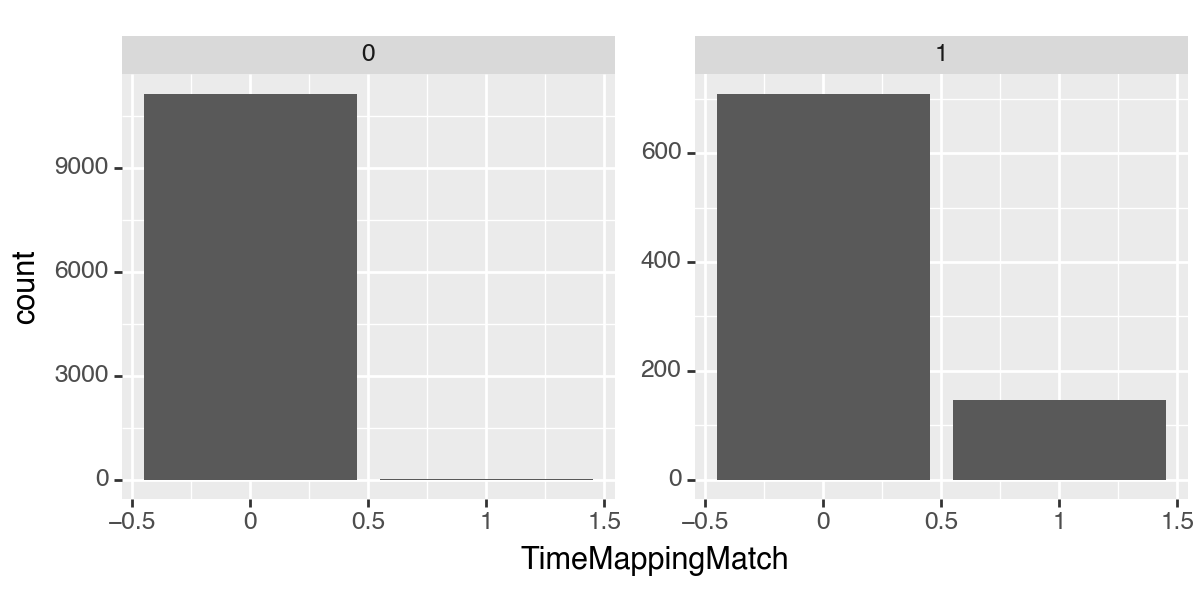

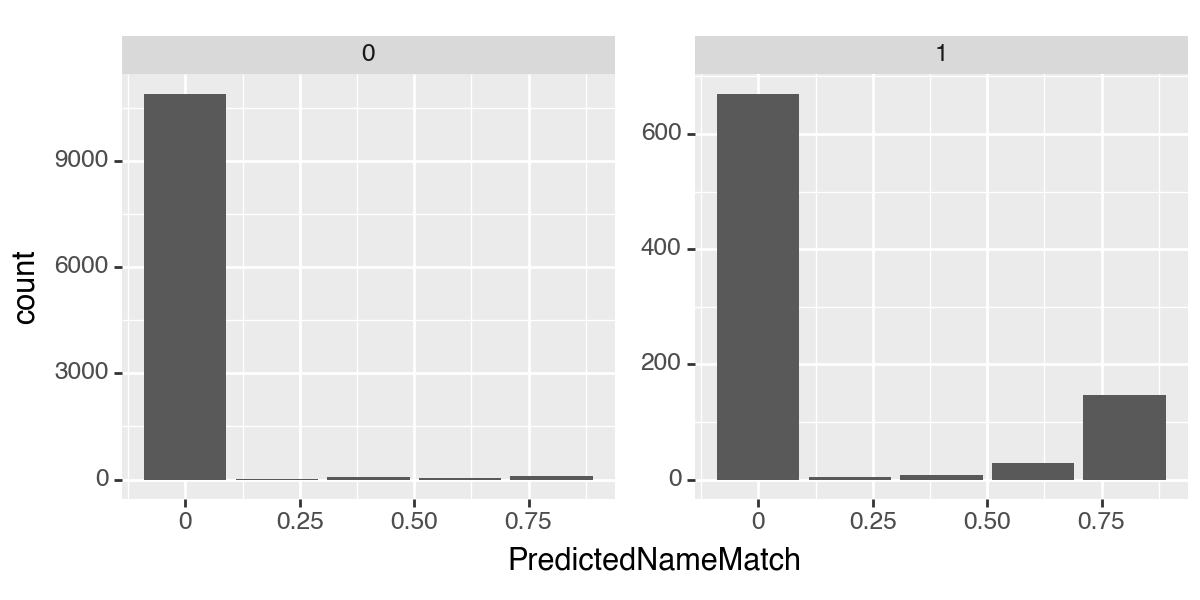

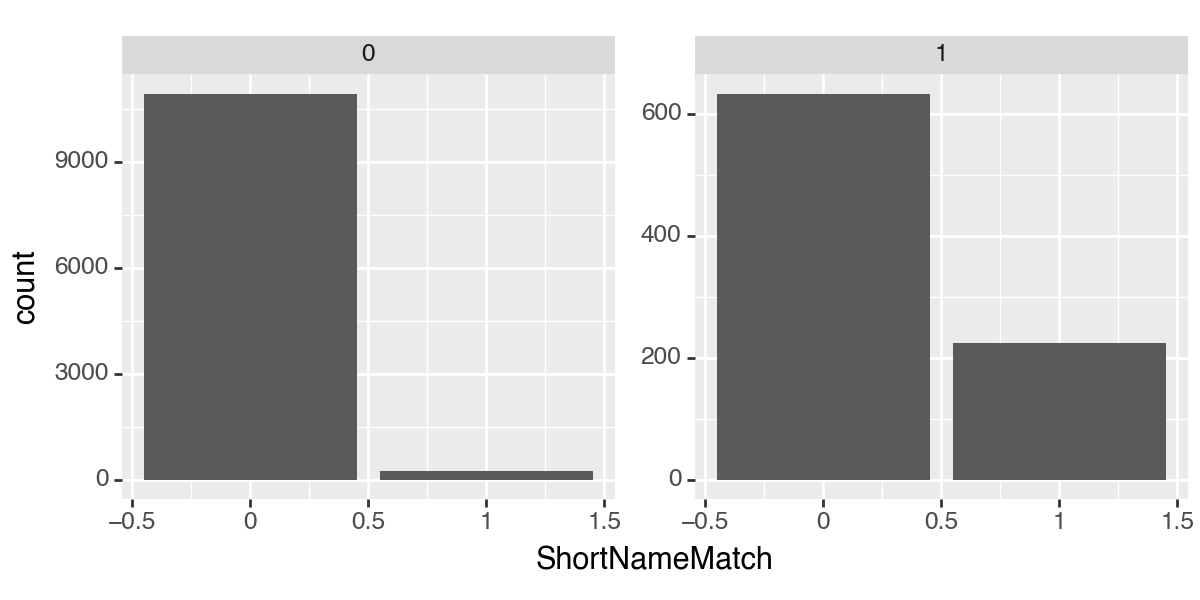

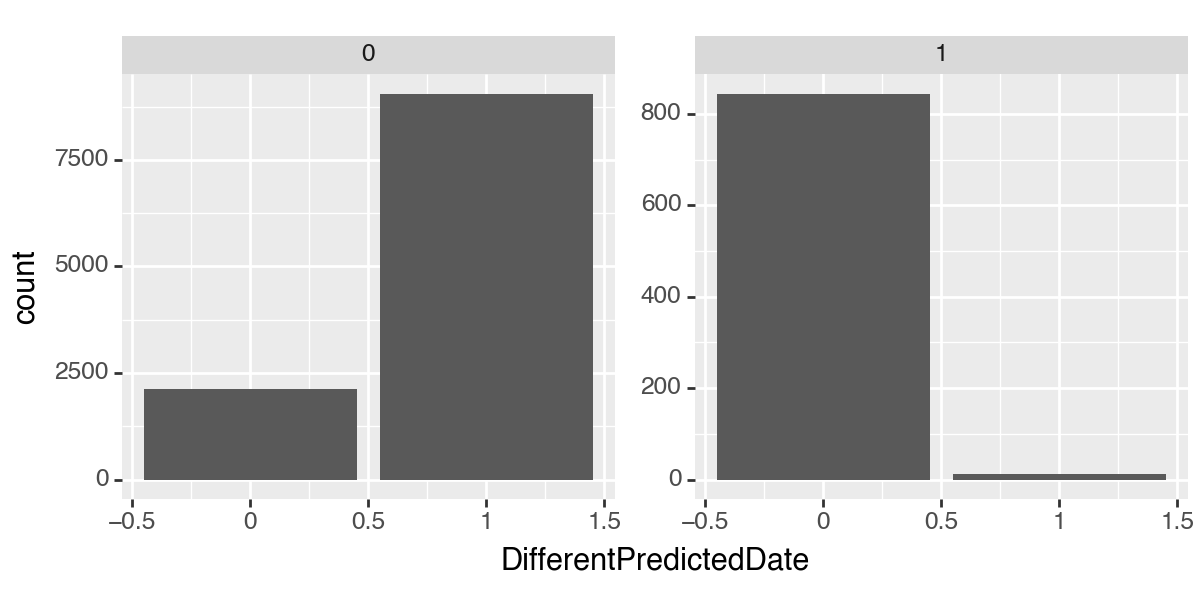

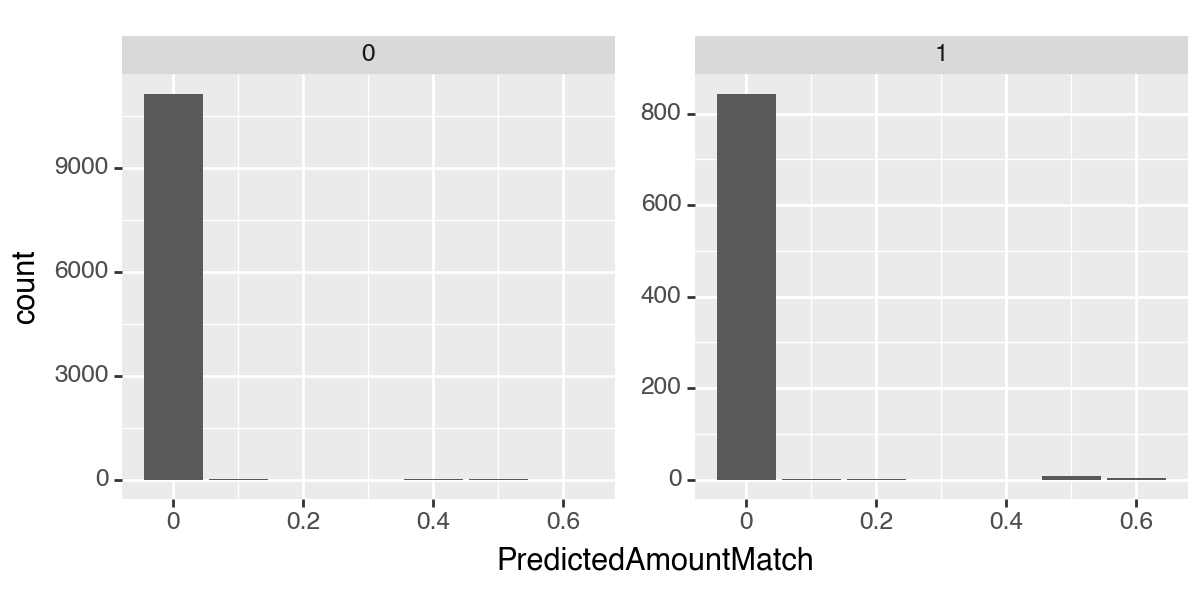

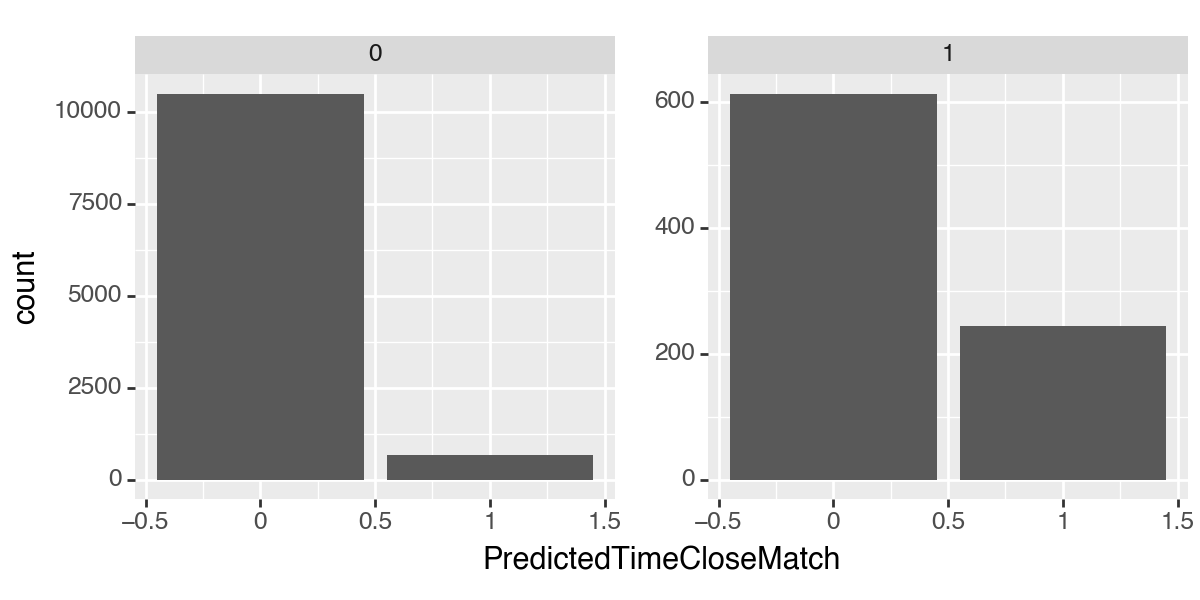

In [23]:
#Checking the distribution for numerical variables 
for var in feature_cols:
    print(
        (
             p9.ggplot(raw_data)
            +p9.aes(x=var)
            +p9.geom_bar()
            +p9.theme(figure_size=(6,3))
            +p9.facet_wrap("matched")
            + p9.facet_wrap("~matched", scales='free_y')
        )
    )

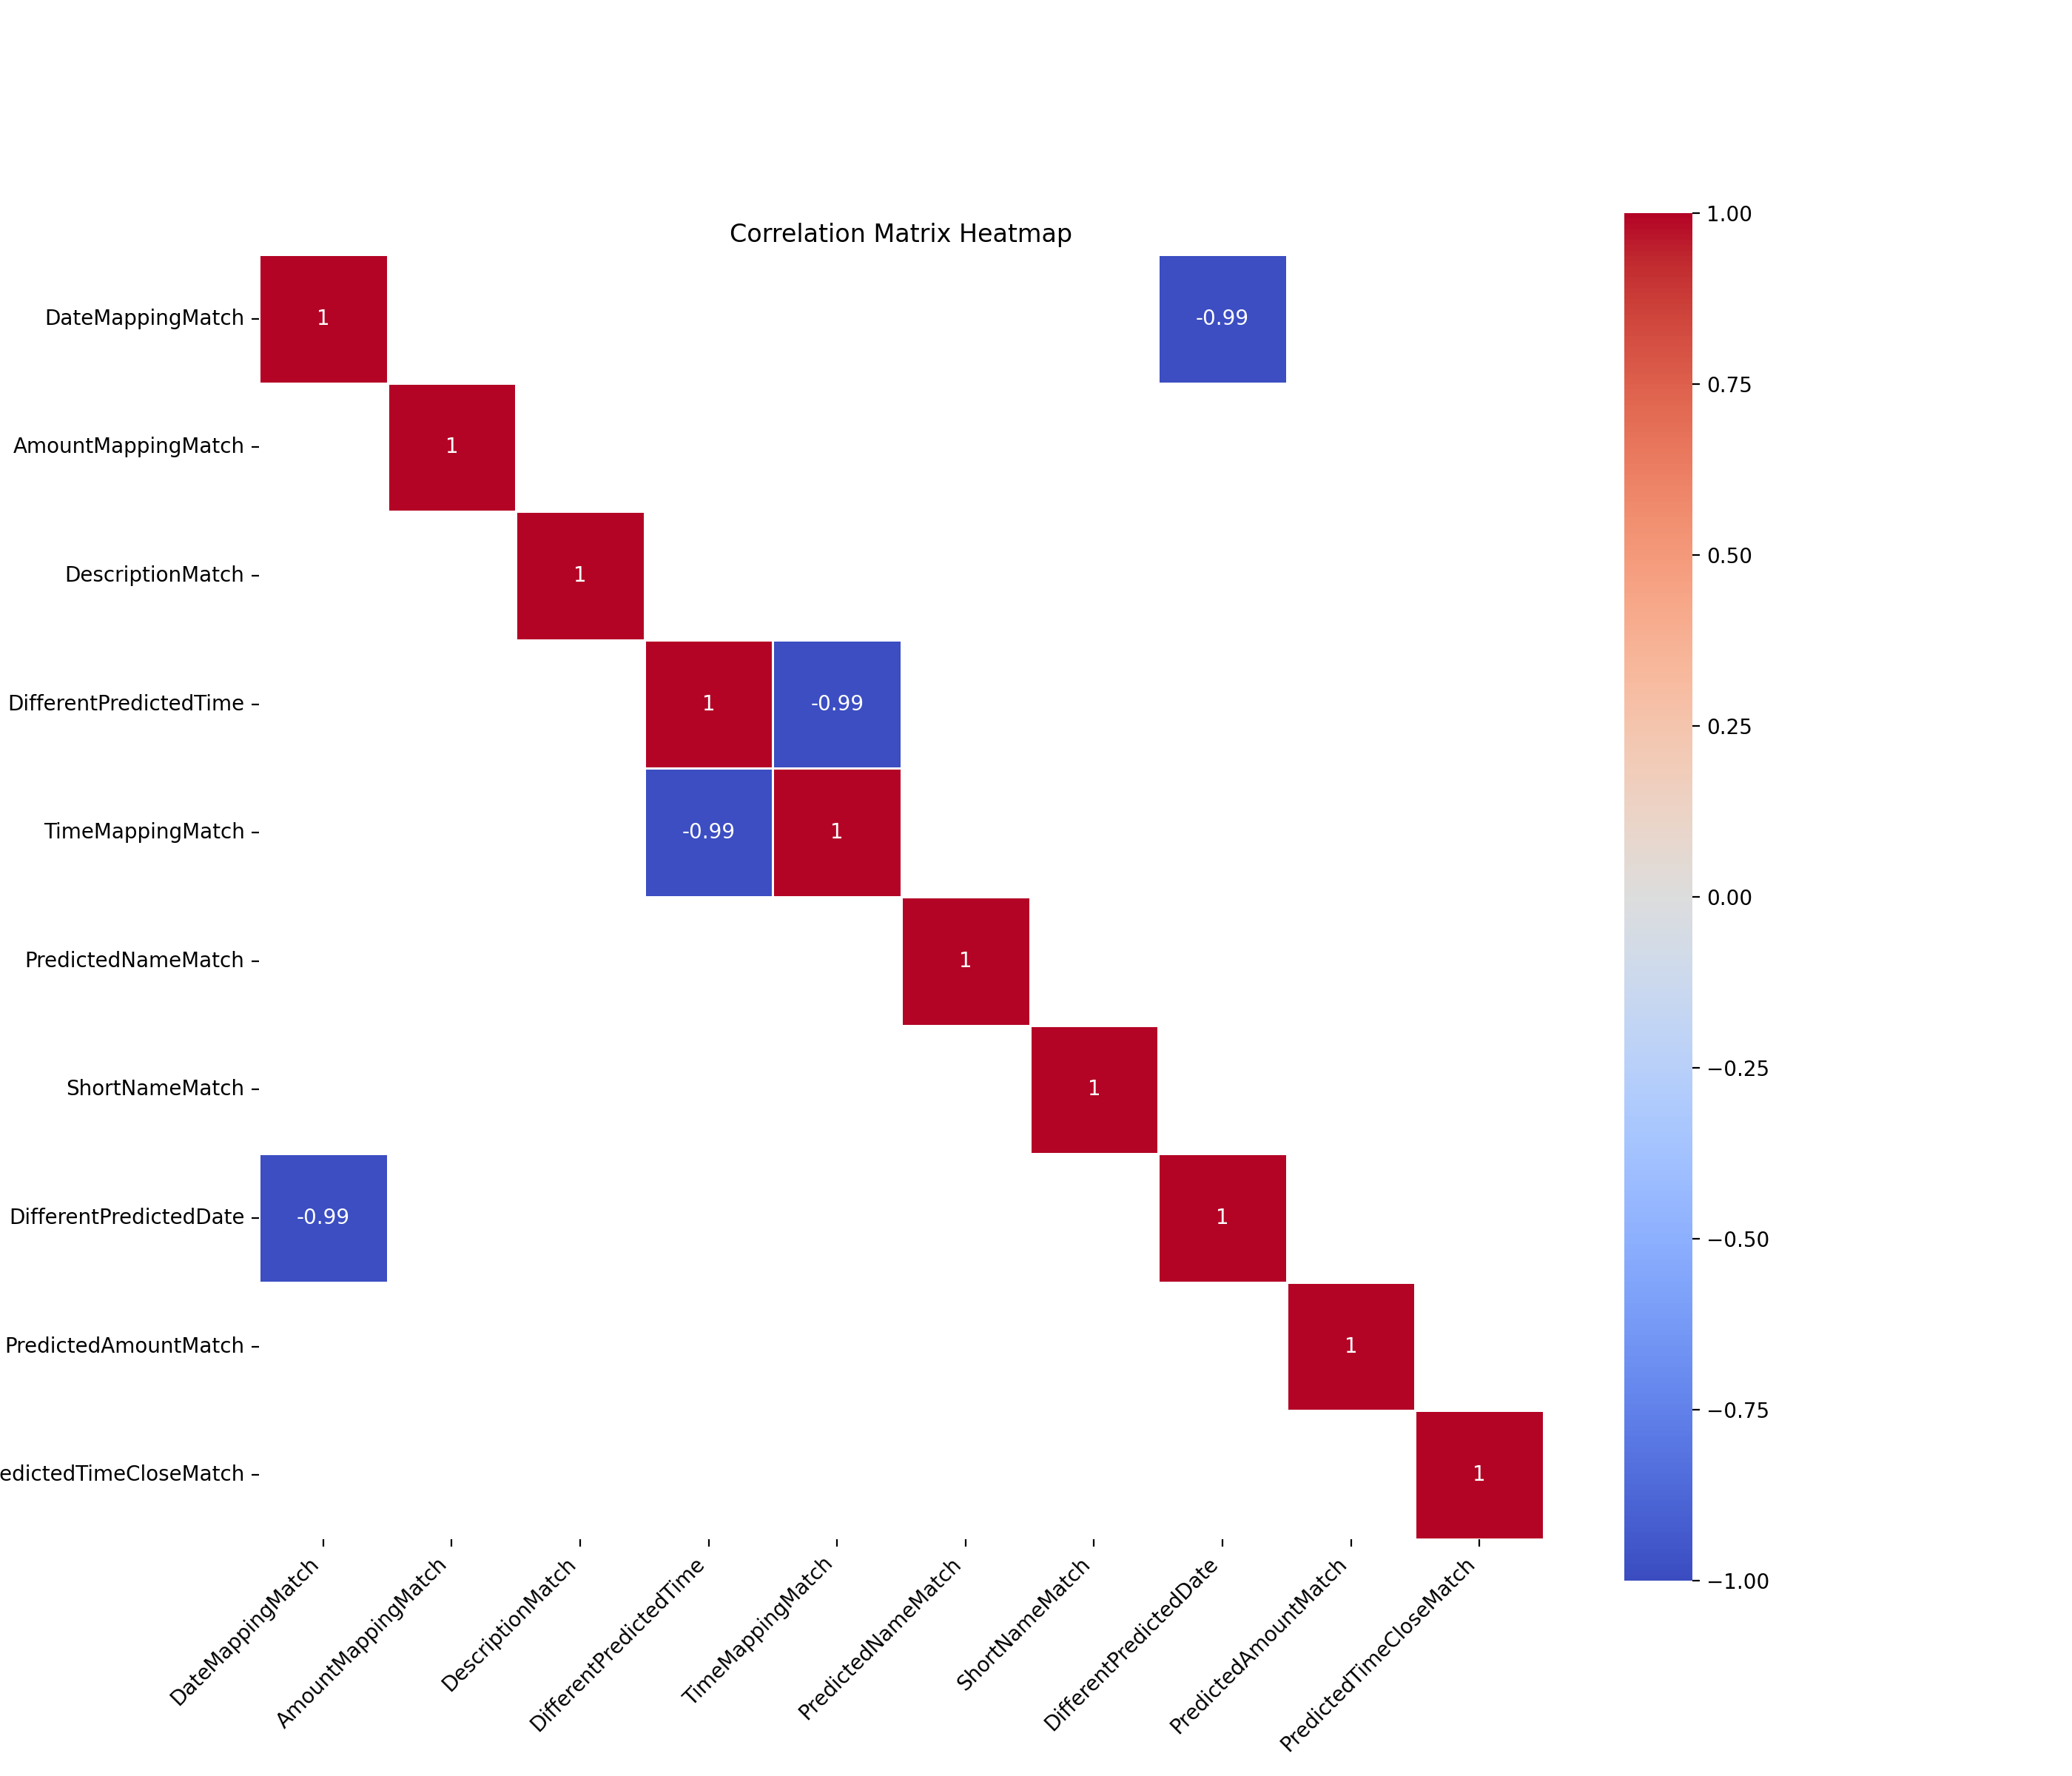

In [33]:
#Correlation between continuous variables
corrThreshold = 0.5
correlation_matrix = raw_data[feature_cols].corr() 
correlation_matrix = correlation_matrix[(correlation_matrix> corrThreshold) | (correlation_matrix < (-1 *corrThreshold) )]

# Initialize a matplotlib figure
plt.figure(figsize=(14, 12))

# Create a heatmap
sns.heatmap(correlation_matrix, 
            annot=True,       # Annotate cells with correlation values
            cmap='coolwarm',  # Choose a color map
            vmin=-1, vmax=1,  # Set the range of values
            square=True,      # Display cells as squares
            linewidths=.5)    # Add lines between cells

# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Show the plot
plt.show()

In [37]:
#Checking the correlation between matched column and different similiarity continuous columns

for col in feature_cols:
    correlation, pvalue = stats.pointbiserialr(raw_data['matched'], raw_data[col])
    print(f"Point Biserial Correlation between Matched Txns and  {col} : r = {correlation:.2f}, p-value = {pvalue:.4f}")


Point Biserial Correlation between Matched Txns and  DateMappingMatch : r = 0.50, p-value = 0.0000
Point Biserial Correlation between Matched Txns and  AmountMappingMatch : r = 0.01, p-value = 0.3162
Point Biserial Correlation between Matched Txns and  DescriptionMatch : r = 0.31, p-value = 0.0000
Point Biserial Correlation between Matched Txns and  DifferentPredictedTime : r = -0.37, p-value = 0.0000
Point Biserial Correlation between Matched Txns and  TimeMappingMatch : r = 0.37, p-value = 0.0000
Point Biserial Correlation between Matched Txns and  PredictedNameMatch : r = 0.30, p-value = 0.0000
Point Biserial Correlation between Matched Txns and  ShortNameMatch : r = 0.32, p-value = 0.0000
Point Biserial Correlation between Matched Txns and  DifferentPredictedDate : r = -0.48, p-value = 0.0000
Point Biserial Correlation between Matched Txns and  PredictedAmountMatch : r = 0.08, p-value = 0.0000
Point Biserial Correlation between Matched Txns and  PredictedTimeCloseMatch : r = 0.22, 

### Insights from the Correlation Analysis
1. There is strong inverse correlation between Date Mapping Match and PredictedDifferentDate
2. There is strong inverse correlation between Time Mapping Matching and PredictedDifferentTime
3. DateMappingMatch, DescriptionMatch,TimeMappingMatch,PredictedNameMatch,ShortNameMatch has slighter positive correlation for matched txn



In [39]:
cat_cols = ['DifferentPredictedTime','TimeMappingMatch','ShortNameMatch','DifferentPredictedDate','PredictedTimeCloseMatch']
raw_data[cat_cols] = raw_data[cat_cols].astype('category')


for col in cat_cols:
    # Create a cross-tabulation
    contingency_table = pd.crosstab(raw_data['matched'], raw_data[col])
    # Perform Chi-Squared test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-Squared Test for {col} : chi2 = {chi2:.2f}, p-value = {p:.4f}")

    n = raw_data.shape[0]
    k = min(contingency_table.shape) - 1
    print(f"Cramér's V: {(np.sqrt(chi2 / (n * k))):.4f}")


Chi-Squared Test for DifferentPredictedTime : chi2 = 1635.63, p-value = 0.0000
Cramér's V: 0.3687
Chi-Squared Test for TimeMappingMatch : chi2 = 1663.42, p-value = 0.0000
Cramér's V: 0.3718
Chi-Squared Test for ShortNameMatch : chi2 = 1257.51, p-value = 0.0000
Cramér's V: 0.3233
Chi-Squared Test for DifferentPredictedDate : chi2 = 2712.87, p-value = 0.0000
Cramér's V: 0.4748
Chi-Squared Test for PredictedTimeCloseMatch : chi2 = 562.65, p-value = 0.0000
Cramér's V: 0.2162


In [40]:
raw_data.to_pickle('./data/processed_data.pkl')